In [53]:
# Create data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.85, random_state=0)
X = X[:, ::-1]

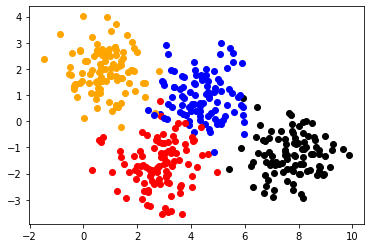

In [41]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0],X[i][1],label='1',color='blue')
    if y[i] == 1:
        plt.scatter(X[i][0],X[i][1],label='0',color='orange')
    if y[i] == 2:
        plt.scatter(X[i][0],X[i][1],label='0',color='red')
    if y[i] == 3:
        plt.scatter(X[i][0],X[i][1],label='0',color='black')

In [122]:
class NaiveBayesClassifier():
    
    def __init__(self, max_bins=10):
        self.class_num = 4

    def training(self, X_train, y_train):
        Prior_probability = np.zeros(self.class_num)
        Post_probability  = np.zeros(X_train.shape)
        
        X_train1_y_train = np.concatenate((np.array([X_train[:,0]]).T,np.array([y_train]).T),axis=1)
        X_train2_y_train = np.concatenate((np.array([X_train[:,1]]).T,np.array([y_train]).T),axis=1)
        
        (unique_y, counts_y) = np.unique(y_train, return_counts=True)
        
        (unique_x1, counts_x1) = np.unique(X_train1_y_train, return_counts=True, axis=0)
        (unique_x2, counts_x2) = np.unique(X_train2_y_train, return_counts=True, axis=0)
        
        for i in range(self.class_num):
            Prior_probability[i] = counts[i]/sum(y_train) 
            for j in range(X_train.shape[0]):
                index_j_in_unique_x1 = np.where(np.logical_and(unique_x1[:,0] == X_train1_y_train[j,0], unique_x1[:,1] == X_train1_y_train[j,1]))[0]             
                Post_probability[j][0] = counts_x1[index_j_in_unique_x1]/counts_y[y_train[j]]
                
                index_j_in_unique_x2 = np.where(np.logical_and(unique_x2[:,0] == X_train2_y_train[j,0], unique_x2[:,1] == X_train2_y_train[j,1]))[0]             
                Post_probability[j][1] = counts_x2[index_j_in_unique_x2]/counts_y[y_train[j]]
                
    def fit(self,X_train):
        Probability = np.zeros([X_train.shape[0],self.class_num])
        for j in range(X_train.shape[0]):
            for i in range(self.class_num):

                index_1 = np.where(np.logical_and(unique_x1[:,0] == X_train[j,0], unique_x1[:,1] == i))[0]
                index_2 = np.where(np.logical_and(unique_x2[:,0] == X_train[j,1], unique_x2[:,1] == i))[0]
                if index_1.size == 0 or index_2.size == 0:
                    Probability[j,i] = 0.0
                else:
                    Probability[j,i] = Prior_probability[i]*Post_probability[index_1[0]][0]*Post_probability[index_2[0]][1]       
    
    def predict(self):      
        results = np.argmax(Probability, axis=1)     
        return results

In [123]:
mymodel = NaiveBayesClassifier()
mymodel.training(X,y)
mymodel.fit(X)
predicted_y = mymodel.predict()

In [124]:
y-predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,